## Final Project Submission

Please fill out:
* Student name: Luigi Fiori
* Student pace: part time
* Scheduled project review date/time: 24/06/19 3pm BST
* Instructor name: Jeff
* Blog post URL:


# Approach to the Project

### -Data Mining: Collect necessary data for our project
### -Data Cleaning: Fix data inconsistencies and handle missing values
### -Business Understaning: Ask relevant questions and define the desired outcome
### -Data Exploration: Create data Visualizations to understand your data and make the necessary hypotheses
### -Predictive Modelling: Train Models, evaluate their performance and use them to create predictions

ls is a command to check the file presents in the current directory.

In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 0E64-91C8

 Directory of C:\Users\Asus\Project_module1\dsc-v2-mod1-final-project-online-ds-pt-051319

07/04/2019  03:01 PM    <DIR>          .
07/04/2019  03:01 PM    <DIR>          ..
07/03/2019  08:00 PM                66 .gitignore
07/04/2019  11:33 AM    <DIR>          .ipynb_checkpoints
07/03/2019  08:00 PM                93 .learn
07/03/2019  08:00 PM         1,425,341 awesome.gif
07/03/2019  08:00 PM             1,120 column_names.md
07/03/2019  08:00 PM             1,846 CONTRIBUTING.md
07/03/2019  08:00 PM            15,050 index.ipynb
07/03/2019  08:00 PM         2,475,934 kc_house_data.csv
07/03/2019  08:00 PM             1,354 LICENSE.md
07/03/2019  08:00 PM            12,820 README.md
07/04/2019  03:01 PM         3,046,691 student.ipynb
07/04/2019  11:33 AM         3,681,970 student-Copy1.ipynb
              11 File(s)     10,662,285 bytes
               3 Dir(s)  24,349,687,808 bytes free


Preprocess data: import the data and preprocess the data that includes cleaning, scrubbing, handling missing values, etc.

# Importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Importing the file

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### First thing after loading the file I'm having a quick look if something jumps out from the dataset checking the first and last  few rows

In [4]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


Describe gives a a quick description of some statistics results such as mean, standard deviation, median and so on.

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


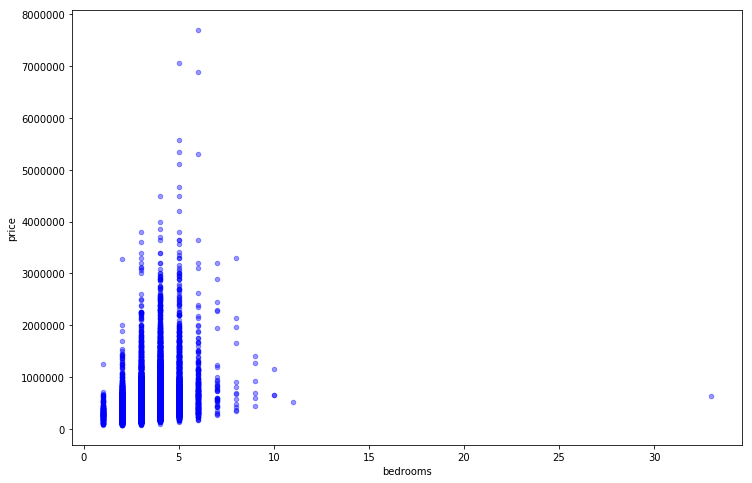

In [6]:
 df.plot(kind='scatter', x= 'bedrooms', y="price", alpha=0.4, color='b', figsize = (12,8))

First thing I notice is an outlier in the bedrooms, the value is 33 and the price is not relatively high in comparison so I'm first double checking with a scatter plot.
Assuming now that there's an error in the data we're going to drop that row.

In [7]:
df = df.drop(df[df["bedrooms"] == 33].index)

Info is a function that tells us some info like nr of columns and rows, data types and size of the file.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       19220 non-null float64
view             21533 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     17754 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


There are in  this DataFrame 21 columns and 21597 rows.
We can also clearly see that there are some null values to deal with.
Already when we first loaded the first rows we could see some Nan values(not a number).
After checking the info we can clearly see that waterfront, view and  yr_renovated contain missing values.
It's important to deal with it because null values in the dataset limit our ability to do important things like:

-Convert data types

-Calculate summary statistics

-Visualize Data

-Build models

Observing our data we can notice that sqft_basement from the info check, results to be an object when instead in reality clearly contains categorical data and after checking so we can see that the 2% of data are missing.
The sqft_living - sqft_above is giving us the total sqft of the basement

Value counts gives us the total count number in this case for 'sqft_basement' normalized so in percentage.

In [9]:
df['sqft_basement'].value_counts(normalize = True)

0.0       0.593906
?         0.021022
600.0     0.010048
500.0     0.009678
700.0     0.009631
800.0     0.009307
400.0     0.008520
1000.0    0.006853
900.0     0.006575
300.0     0.006575
200.0     0.004862
750.0     0.004816
530.0     0.004769
450.0     0.004769
480.0     0.004769
720.0     0.004538
620.0     0.004167
580.0     0.003843
840.0     0.003843
420.0     0.003751
860.0     0.003658
670.0     0.003612
1100.0    0.003612
780.0     0.003519
550.0     0.003519
650.0     0.003473
240.0     0.003427
680.0     0.003380
380.0     0.003380
850.0     0.003334
            ...   
588.0     0.000046
1770.0    0.000046
2570.0    0.000046
20.0      0.000046
2120.0    0.000046
266.0     0.000046
1930.0    0.000046
143.0     0.000046
946.0     0.000046
2180.0    0.000046
704.0     0.000046
2390.0    0.000046
1913.0    0.000046
2130.0    0.000046
2850.0    0.000046
1920.0    0.000046
172.0     0.000046
2580.0    0.000046
3500.0    0.000046
2050.0    0.000046
666.0     0.000046
906.0     0.

As we can see above 'sqft basement' results having missing values after a deeper look.
Python did recognies missing values but put ? instead of Nan.
We can see that sq_ft basement is the difference beetween sqft_living and above.
So below we use the loc function to select parts of the frame where there are missing values and substitute the ? value with that difference.

Loc is used to slice through the columns and rows of the dataframe and it's useful when we need to select from it just certain parts.

In [10]:
df.loc[((df['sqft_living']) > (df['sqft_above'])) & (df['sqft_basement'] == '?'), :]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
115,3626039325,11/21/2014,740500.0,3,3.50,4380,6350,2.0,0.0,0.0,...,8,2780,?,1900,NaN,98117,47.6981,-122.368,1830,6350
309,3204800200,1/8/2015,665000.0,4,2.75,3320,10574,2.0,NaN,0.0,...,8,2220,?,1960,0.0,98056,47.5376,-122.180,2720,8330
384,713500030,7/28/2014,1350000.0,5,3.50,4800,14984,2.0,0.0,2.0,...,11,3480,?,1998,0.0,98006,47.5543,-122.148,4050,19009
508,5113400431,5/8/2014,615000.0,2,1.00,1540,6872,1.0,0.0,0.0,...,7,820,?,1946,0.0,98119,47.6454,-122.373,1420,5538
633,8832900550,9/12/2014,650000.0,3,2.50,2690,11575,1.0,0.0,3.0,...,8,2130,?,1957,0.0,98028,47.7605,-122.267,2390,11782
645,1545804340,4/9/2015,240000.0,3,1.75,1760,6500,1.0,0.0,0.0,...,7,1150,?,1987,0.0,98038,47.3647,-122.050,1760,8125
671,5101405124,9/12/2014,435000.0,4,2.50,1700,6380,1.0,0.0,0.0,...,7,850,?,1940,0.0,98115,47.6988,-122.319,1380,6380
755,5149300200,9/2/2014,316500.0,3,1.75,1600,14250,1.0,0.0,0.0,...,7,1070,?,1979,0.0,98023,47.3272,-122.355,2140,14960
1073,9209900270,2/5/2015,515000.0,2,1.00,1060,4228,1.0,0.0,0.0,...,7,860,?,1906,0.0,98112,47.6231,-122.293,1060,4187


### To deal with it we create a new column and this column would be 1 if it's satisfied the condition above or 0 if is not.
### Based on the new column if the value is 1 we will replace the sqft basement with the difference between sqft living and above.

In [11]:
#step 1
df['check_column'] = 0
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,check_column
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [12]:
#step 2
df.loc[((df['sqft_living']) >= (df['sqft_above'])) & (df['sqft_basement'] == '?'), 'check_column'] = 1

In [13]:
df.loc[df['check_column'] == 1, 'sqft_basement'] = (df['sqft_living']) - (df['sqft_above'])

In [14]:
df.loc[df['check_column'] == 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,check_column
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1715,0,1995,0.0,98003,47.3097,-122.327,2238,6819,1
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,1200,0,1921,0.0,98002,47.3089,-122.210,1060,5095,1
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,3595,0,2014,0.0,98053,47.6848,-122.016,3625,5639,1
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,3450,0,2002,0.0,98010,47.3420,-122.025,3350,39750,1
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,1160,380,1980,0.0,98038,47.3624,-122.031,1540,11656,1
115,3626039325,11/21/2014,740500.0,3,3.50,4380,6350,2.0,0.0,0.0,...,2780,1600,1900,NaN,98117,47.6981,-122.368,1830,6350,1
217,1909600046,7/3/2014,445838.0,3,2.50,2250,5692,2.0,0.0,0.0,...,2250,0,2000,0.0,98146,47.5133,-122.379,1320,5390,1
309,3204800200,1/8/2015,665000.0,4,2.75,3320,10574,2.0,NaN,0.0,...,2220,1100,1960,0.0,98056,47.5376,-122.180,2720,8330,1
384,713500030,7/28/2014,1350000.0,5,3.50,4800,14984,2.0,0.0,2.0,...,3480,1320,1998,0.0,98006,47.5543,-122.148,4050,19009,1
508,5113400431,5/8/2014,615000.0,2,1.00,1540,6872,1.0,0.0,0.0,...,820,720,1946,0.0,98119,47.6454,-122.373,1420,5538,1


In [15]:
df['sqft_basement'].value_counts(normalize = True)

0.0       0.593906
0         0.013151
600.0     0.010048
500.0     0.009678
700.0     0.009631
800.0     0.009307
400.0     0.008520
1000.0    0.006853
900.0     0.006575
300.0     0.006575
200.0     0.004862
750.0     0.004816
480.0     0.004769
450.0     0.004769
530.0     0.004769
720.0     0.004538
620.0     0.004167
840.0     0.003843
580.0     0.003843
420.0     0.003751
860.0     0.003658
1100.0    0.003612
670.0     0.003612
780.0     0.003519
550.0     0.003519
650.0     0.003473
240.0     0.003427
380.0     0.003380
680.0     0.003380
850.0     0.003334
            ...   
870       0.000046
860       0.000046
810       0.000046
946.0     0.000046
2580.0    0.000046
780       0.000046
3000.0    0.000046
750       0.000046
602.0     0.000046
1000      0.000046
518.0     0.000046
1020      0.000046
2590      0.000046
2720.0    0.000046
2620      0.000046
417.0     0.000046
1281.0    0.000046
4130.0    0.000046
1200      0.000046
415.0     0.000046
248.0     0.000046
1180      0.

I'm converting the datatype to float because we assigned at it 0, an integer value.

In [16]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [17]:
df['sqft_basement'].value_counts(normalize = True)

0.0       0.607057
600.0     0.010233
700.0     0.010094
500.0     0.009909
800.0     0.009539
400.0     0.008520
1000.0    0.006899
900.0     0.006668
300.0     0.006575
200.0     0.005001
530.0     0.004955
480.0     0.004908
750.0     0.004862
450.0     0.004769
720.0     0.004723
620.0     0.004214
840.0     0.003936
580.0     0.003890
420.0     0.003751
860.0     0.003704
1100.0    0.003704
670.0     0.003658
780.0     0.003565
380.0     0.003519
550.0     0.003519
850.0     0.003519
650.0     0.003519
680.0     0.003473
240.0     0.003427
360.0     0.003380
            ...   
2610.0    0.000046
2600.0    0.000046
283.0     0.000046
2850.0    0.000046
1245.0    0.000046
2130.0    0.000046
518.0     0.000046
415.0     0.000046
2180.0    0.000046
243.0     0.000046
1525.0    0.000046
2620.0    0.000046
1135.0    0.000046
225.0     0.000046
3000.0    0.000046
2500.0    0.000046
935.0     0.000046
266.0     0.000046
1920.0    0.000046
1990.0    0.000046
2590.0    0.000046
1548.0    0.

With this function isnull we get True when the value is missing.

In [18]:
df.isnull()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,check_column
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Obviusly it would be quite tedious to go through all the data checking for missing values.
But chaining the previous function with any we obtain for each single row a True or False if null values are present.

In [19]:
df.isnull().any()


id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
check_column     False
dtype: bool

With this function plus sum we check how many values are missing in each row.

In [20]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
check_column        0
dtype: int64

Now that we know how many values are missing we can make some decisions how to deal with it
Usually that are 3:

-Drop the column if there are a lot of missing values

-Drop rows in case we have not many values missing

-Input values if we think that we got a clear idea on those values missing and we can use fillna function to replace i
t

Obviuosly when dropping rows and columns we lose information so it's ideal to keep those data if we can, but at the same time
filling up data that are not accurate would be even much worse.

Lenght of the entire number of rows.

In [21]:
len(df.index) 

21596

Percentage of null values for the column yr_renovated and view.

In [22]:
df['yr_renovated'].isnull().sum() / len(df.index)

0.1779033154287831

In [23]:
df['view'].isnull().sum() / len(df.index)

0.0029172068901648454

For the 'view' column not even 1% of datas missing so we gonna drop the corresponding rows considering that just a small amount of datas will be lost.
With dropna we drop the desired rows.

In [24]:
df.dropna(subset = ['view'], inplace = True)

In [25]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2370
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
check_column        0
dtype: int64

In [26]:
df['waterfront'].isnull().sum() / len(df.index)

0.1100636232759021

For the waterfront column 11% of the datas are missing.

In [27]:
df['waterfront'].value_counts(normalize = True)

0.0    0.992433
1.0    0.007567
Name: waterfront, dtype: float64

In [28]:
df.groupby('zipcode')['waterfront'].value_counts()

zipcode  waterfront
98001    0.0           326
98002    0.0           179
98003    0.0           255
98004    0.0           281
         1.0             1
98005    0.0           158
98006    0.0           433
         1.0             4
98007    0.0           121
98008    0.0           247
         1.0             9
98010    0.0            87
98011    0.0           174
98014    0.0           110
98019    0.0           167
98022    0.0           208
98023    0.0           440
         1.0             3
98024    0.0            72
98027    0.0           367
         1.0             2
98028    0.0           253
         1.0             1
98029    0.0           293
98030    0.0           235
98031    0.0           244
98032    0.0           114
98033    0.0           373
         1.0             3
98034    0.0           479
                      ... 
98117    0.0           495
98118    0.0           442
         1.0             3
98119    0.0           165
98122    0.0           260
98125   

After the value count we can notice that less than 1% of the houses present a view on the waterfalls.
Having more time would be nice to check a correlation between zipcode and presence of the view for the waterfalls but in this case considering that the percentage is really small we will change the null values with 0.0 meaning that there is no waterfall view.

In [29]:
df['waterfront'] = df['waterfront'].fillna(value=0.0)

In [30]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
check_column     False
dtype: bool

We got left, presenting null values, just yr_renovated, in this case considering that the values mising are almost a 20% and we don't have much informations about this feature we will drop the entire column

In [31]:
df = df.drop('yr_renovated', axis = 1)
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
check_column     0
dtype: int64

With the loop below we iterate to check all the value counts in percentage so if there are some null values hidden we can find them.

In [32]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
5430300171    0.000093
5083000375    0.000093
3395040550    0.000093
5101405604    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006595
6/26/2014    0.006084
6/25/2014    0.006037
7/8/2014     0.005898
4/27/2015    0.005759
Name: date, dtype: float64 


price 
 450000.0    0.007941
350000.0    0.007941
550000.0    0.007384
500000.0    0.007059
425000.0    0.006966
Name: price, dtype: float64 


bedrooms 
 3    0.454697
4    0.318813
2    0.127897
5    0.074119
6    0.012539
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249106
1.00    0.178377
1.75    0.140900
2.25    0.094599
2.00    0.089444
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006409
1400    0.006223
1440    0.006177
1010    0.005991
1800    0.005991
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016579
6000    0.013421
4000    0.011657
7200    0.010217
4800    0.005526
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494218
2.0    0.381322
1.5    

So at this point we dealt with our missing values.
Next step will be to check through our categorical variables if we can manipulate them so that in the future we will have a better model using those.
I will also check if there are columns that are not gonna be useful for our porpuse.

We check again with describe to see how the data are split in the distribution.
Based on this we can have an initial idea if we are dealing with continous or categorical variables.

In [33]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,check_column
count,2.153300e+04,2.153300e+04,21533.000000,21533.000000,21533.000000,2.153300e+04,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000
mean,4.582452e+09,5.400530e+05,3.371662,2.115729,2079.849208,1.509102e+04,1.494149,0.006734,0.233874,3.409650,7.657456,1788.592300,291.256908,1971.003390,98077.938188,47.560174,-122.213943,1986.330423,12751.453397,0.020991
std,2.876808e+09,3.660674e+05,0.904162,0.768616,917.462472,4.138112e+04,0.539808,0.081785,0.765702,0.650579,1.172661,827.749142,442.205716,29.376271,53.507609,0.138529,0.140736,685.122310,27256.060980,0.143357
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123050e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904950e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000,0.000000
75%,7.312200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000,0.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


I'm gonna drop the column 'check_column' that we don't need anymore.

In [34]:
df = df.drop('check_column', axis = 1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


I'm dropping the 'id' column too considering that I don't think I can get valuable informations from it.

In [35]:
df = df.drop('id', axis = 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


I'm also gonna change the data type for date so I can deal with it in an easier way.
I'm also gonna convert the date column in a new one with just the months so that I'll use it to extract some info that may be interesting later on.

In [36]:
df['date'] = pd.to_datetime(df['date'])
df['date']= df['date'].dt.month
df['date']

0        10
1        12
2         2
3        12
4         2
5         5
6         6
8         4
9         3
10        4
11        5
12        5
13       10
14        3
15        1
16        7
17        5
18       12
19        4
20        5
21        8
22        7
23        5
24       11
25       11
26        6
27       12
28        6
29        3
30       11
         ..
21566    11
21567     6
21568    12
21569     8
21570    10
21571     3
21572    11
21573     9
21574     5
21575    10
21576     4
21577     3
21578    10
21579    10
21580     8
21581     4
21582    10
21583     9
21584    10
21585     4
21586     6
21587     8
21588     1
21590     3
21591     2
21592     5
21593     2
21594     6
21595     1
21596    10
Name: date, Length: 21533, dtype: int64

I'm having a look if the datasat contains duplicates and remove them in case.

In [37]:
duplicates = df[df.duplicated()]
print(len(duplicates))


2


In [38]:
duplicates.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
4348,3,259950.0,2,2.00,1070,649,2.0,0.0,0.0,3,9,720,350.0,2008,98106,47.5213,-122.357,1070,928
20508,3,529500.0,3,2.25,1410,905,3.0,0.0,0.0,3,9,1410,0.0,2014,98116,47.5818,-122.402,1510,1352


In [39]:
df.drop_duplicates(keep = False, inplace = True) 

In [40]:
duplicates.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
4348,3,259950.0,2,2.00,1070,649,2.0,0.0,0.0,3,9,720,350.0,2008,98106,47.5213,-122.357,1070,928
20508,3,529500.0,3,2.25,1410,905,3.0,0.0,0.0,3,9,1410,0.0,2014,98116,47.5818,-122.402,1510,1352


# Dealing with Categorical Variables

For the next step I'm going to check the categorical variables and understand if does makes sense to modify them.
First thing I want to do is to plot a scatter plot and after an histogram to see the distribution.
When we are dealing with categorical variables we are expecting a scatter plot with the data grouped in vertical lines.
We already have an idea on these data based on before when we checked with the function describe.

# Plot scatter plots to check the distribution

We can customise the style of our plot with the function style to make it look nicer

In [41]:
plt.style.use('ggplot')

Below I'm creating subplots so that I can plot more graphs on the same  row.

I'm using scatterplots to plot each predictor against the target variable

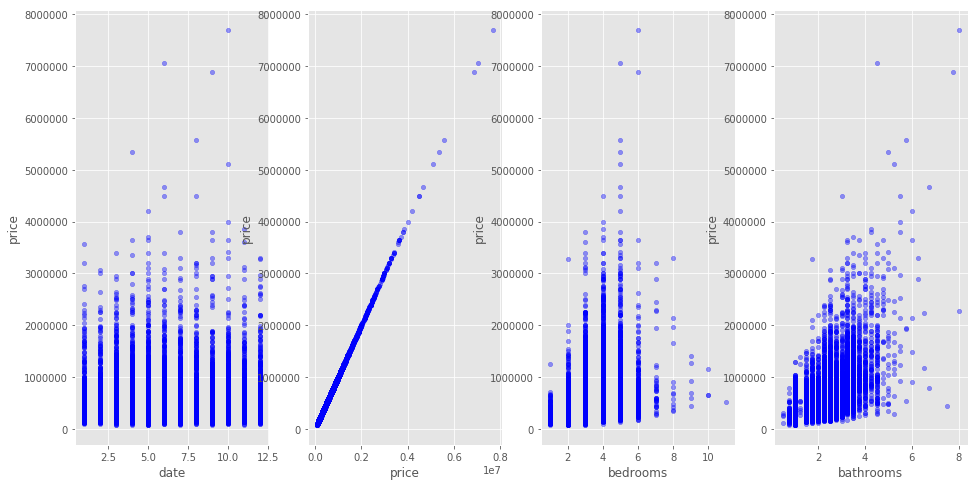

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,8))

for xcol, ax in zip(list(df)[0:4], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')


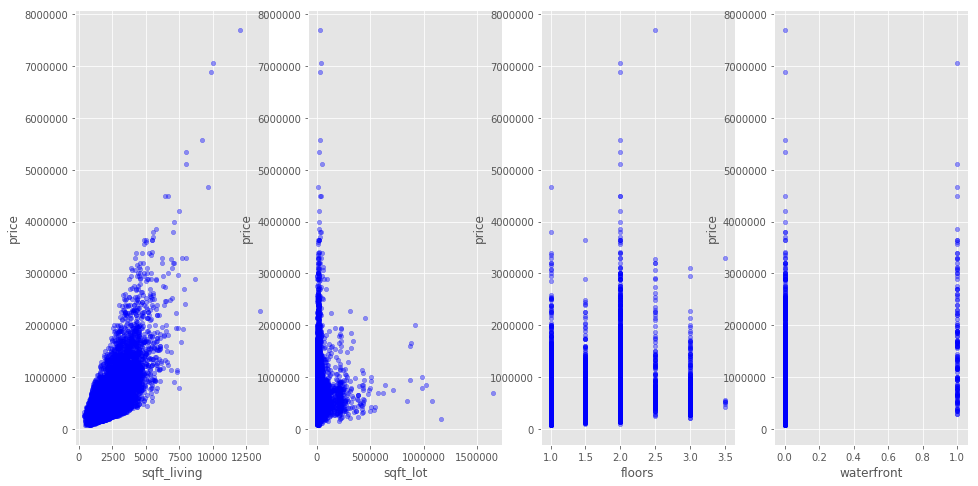

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,8))

for xcol, ax in zip(list(df)[4:8], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

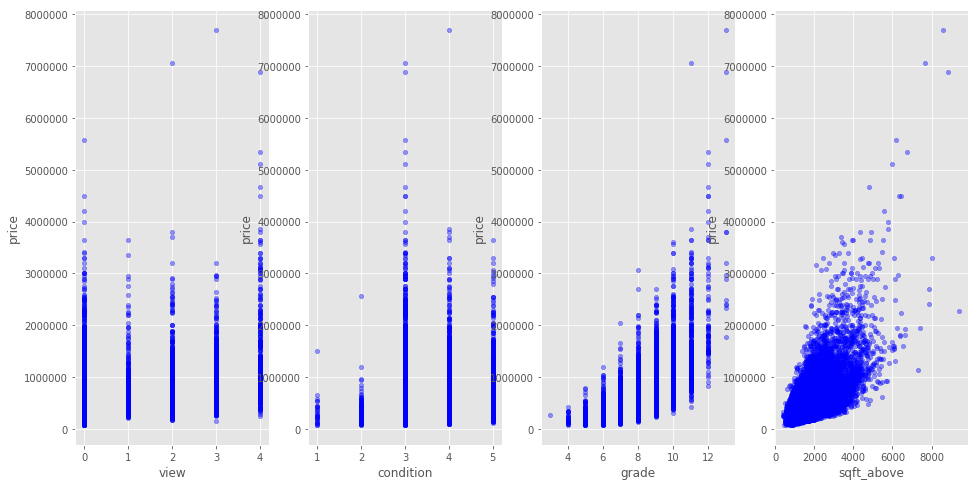

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,8))

for xcol, ax in zip(list(df)[8:12], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

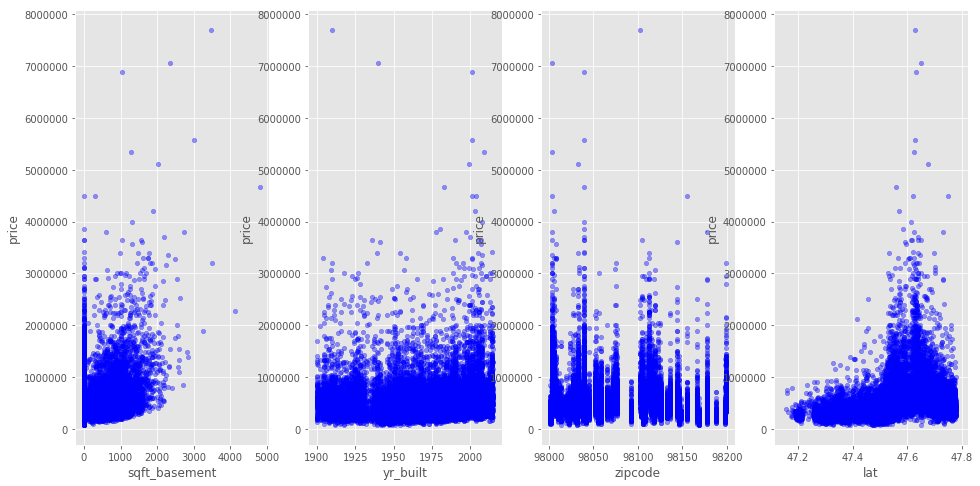

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,8))

for xcol, ax in zip(list(df)[12:16], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

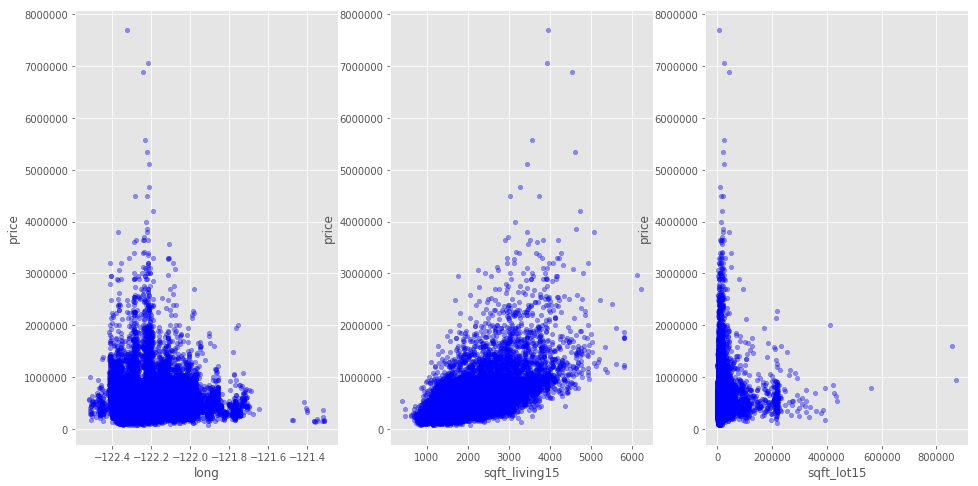

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

for xcol, ax in zip(list(df)[16:19], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

### Date, bedrooms, bathrooms, floors, waterfront, condition, grade and zipcode are clearly categorical variables.

# I'm gonna now create some dummies to manage the categorical variables
Dummies is a function that creates a new column for each single variable and assigns 1 when that value is present.

In [47]:
pd.get_dummies(df["zipcode"])

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
pd.get_dummies(df["view"])

,0.0,1.0,2.0,3.0,4.0
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
6,1,0,0,0,0
8,1,0,0,0,0
9,1,0,0,0,0
10,1,0,0,0,0


In [49]:
pd.get_dummies(df["date"])

,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,0,0,0,0


In [50]:
view_dummies = pd.get_dummies(df["view"], prefix="vw")
date_dummies = pd.get_dummies(df["date"], prefix="dt")
zipcode_dummies = pd.get_dummies(df["zipcode"], prefix="zc")

We gonna now drop the columns with categorical variables and changing it with the dummies.

In [51]:
df = df.drop(["date","view","zipcode"], axis=1)

Concat is a function used to concatenate different frames.

In [52]:
df = pd.concat([df, view_dummies, date_dummies, zipcode_dummies], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,zc_98146,zc_98148,zc_98155,zc_98166,zc_98168,zc_98177,zc_98178,zc_98188,zc_98198,zc_98199
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,...,0,0,0,0,0,0,0,0,0,0


I'm also deciding to put few conditions on price, sqft_living, sqft_lot, sqft_lot15 sqft_above, sqft_basement and sqft_living15 after checking the scatter plots, because we can clearly see from the scatter plot that after that range we don't have enough data to get good predictions..
This to get a more normal distribution for those variables.
I could use log transform instead but I would lose interpretability so I prefer to follow this path.

In [53]:
df = df.loc[(df['price']< 2000000)]

In [54]:
df = df.loc[(df['sqft_living']< 5000)]

In [55]:
df = df.loc[(df['sqft_living15']< 6000)]

In [56]:
df = df.loc[(df['sqft_lot']< 500000)]

In [57]:
df = df.loc[(df['sqft_lot15']< 400000)]

In [58]:
df = df.loc[(df['sqft_basement']< 3000)]

In [59]:
df = df.loc[(df['sqft_above']< 7000)]

# Linear Regression
Regression analysis is one of the most important statistical techniques for business applications. It’s a statistical methodology that helps estimate the strength and direction of the relationship between two (or more variables).
We want to do so we can find a 'best fit' line that it's reducing the error between the actual and expected  value.

# There are 3 assumptions for linear regression:
- Linearity
- Normality
- Homoscedasticity

The linearity assumptions requires that there is a linear relationship between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant(checked with scatter plots).

The normality assumption states that the model residuals should follow a normal distribution(checked with Q-Q plots).

Heteroscedasticity (also spelled heteroskedasticity) refers to the circumstance in which the dependent variable is unequal across the range of values of the predictor(s)(checked with scatter plots).

Above we arleady checked the scatter plots for normality.

We gonna now plot the histograms to check the normality fir the distribution.

# Plot Histograms with KDE overlay to check the distribution

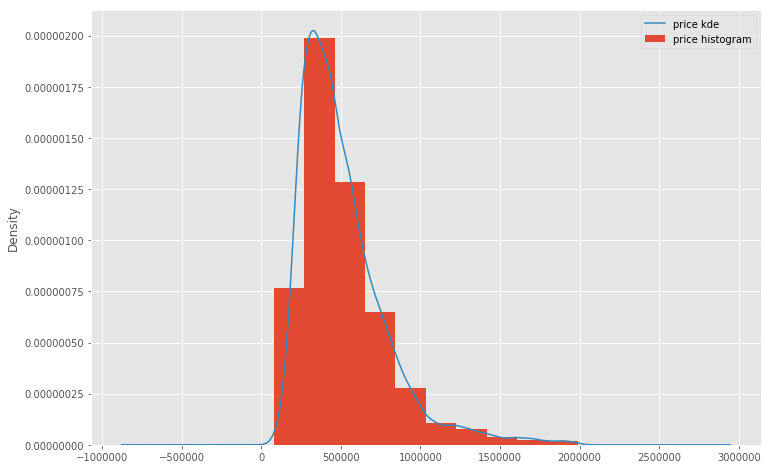

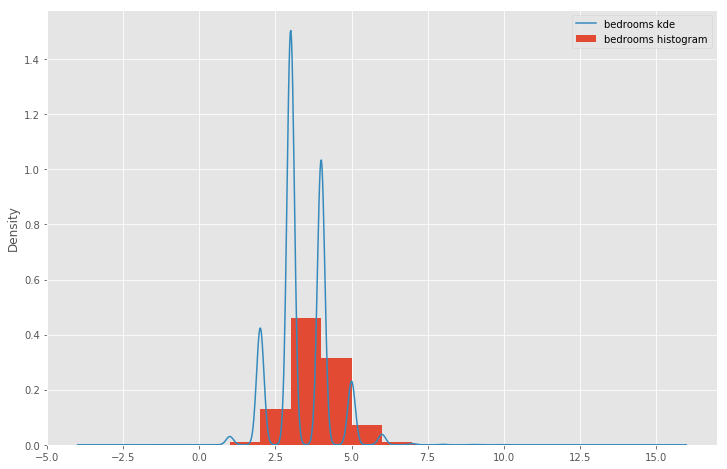

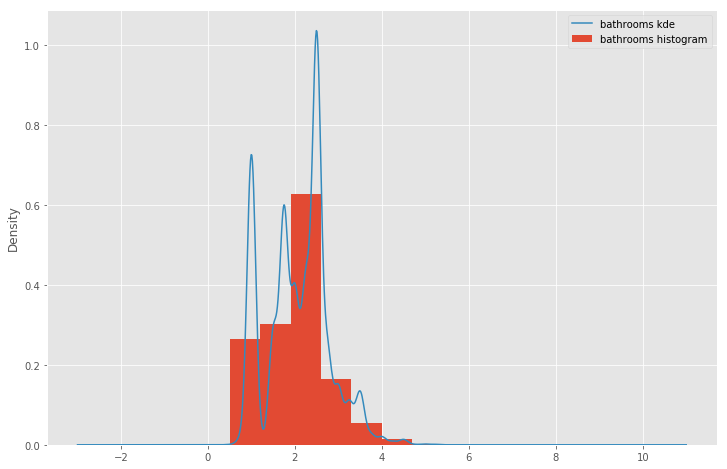

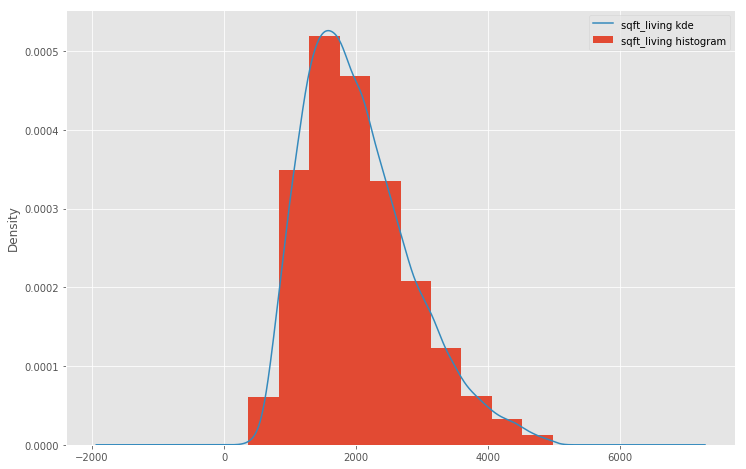

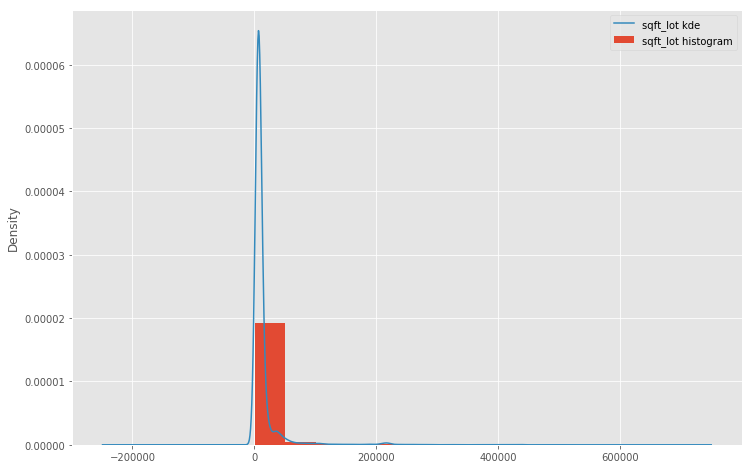

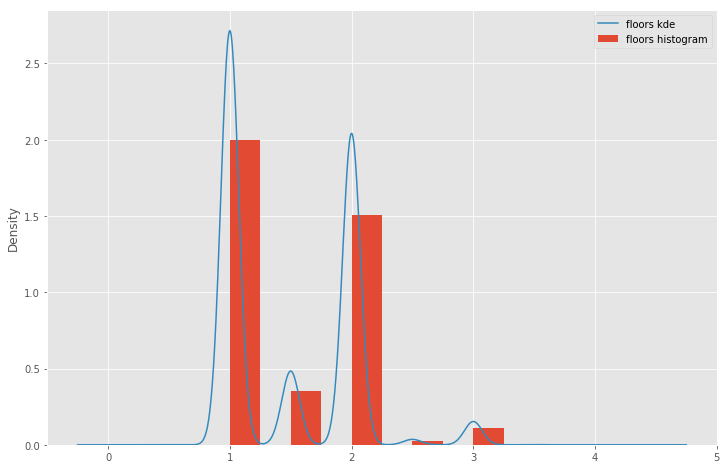

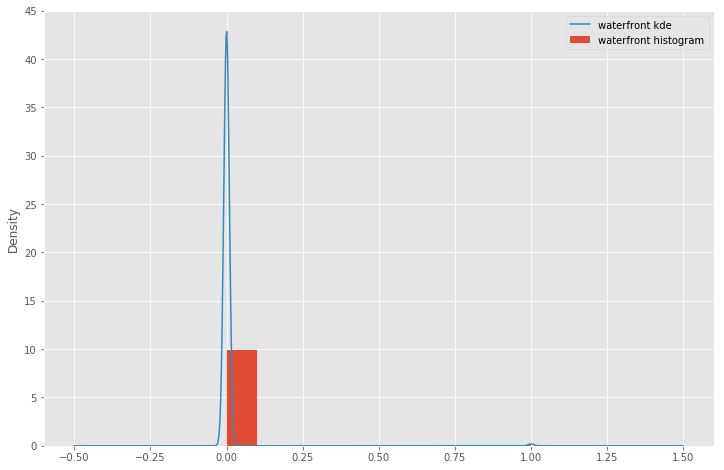

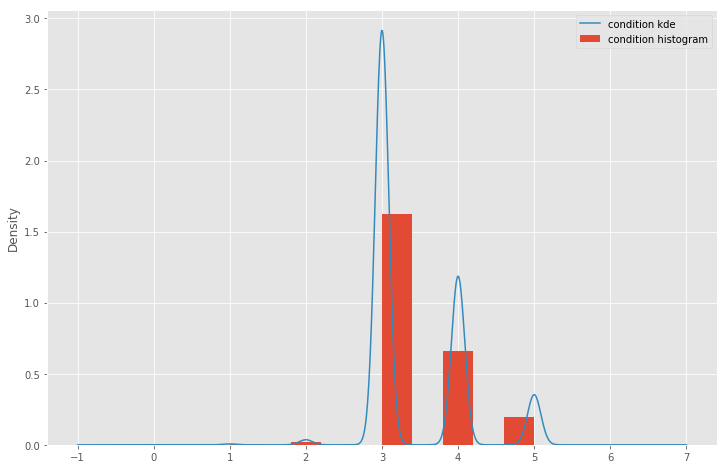

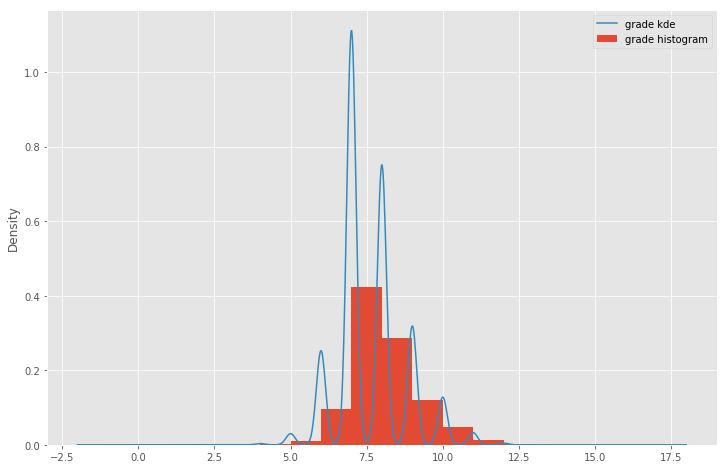

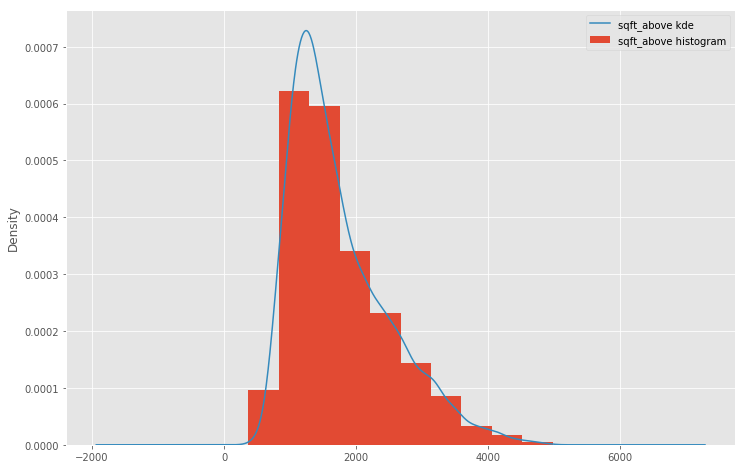

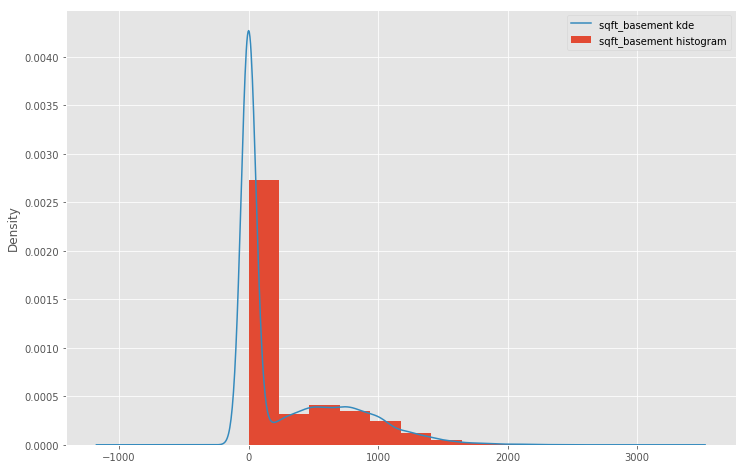

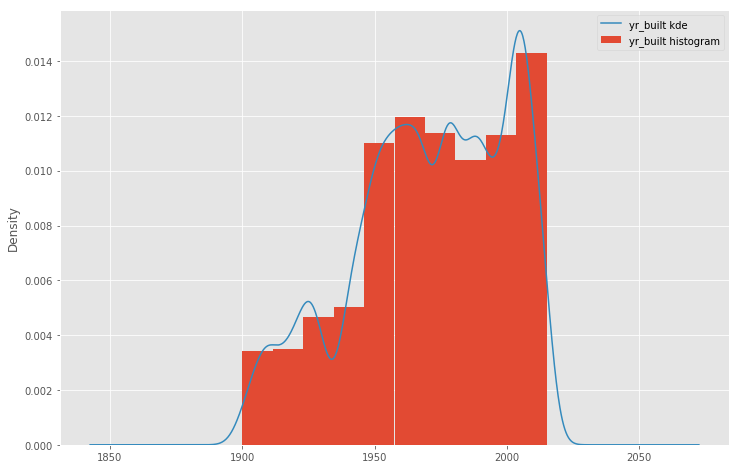

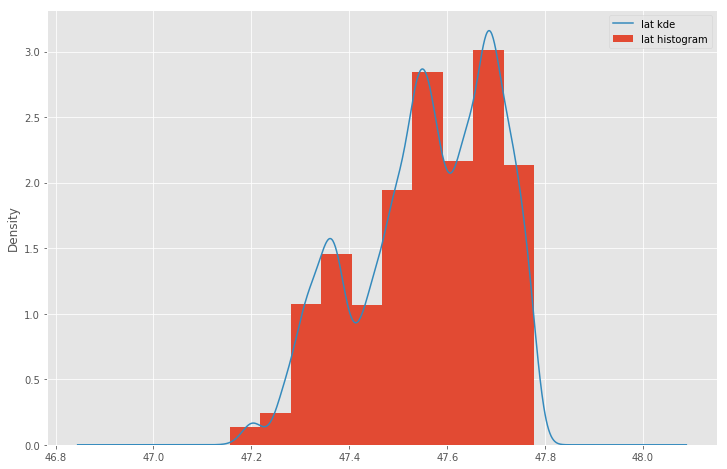

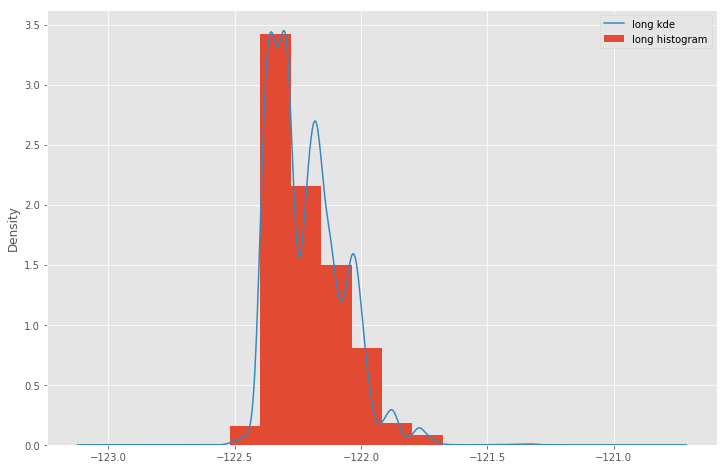

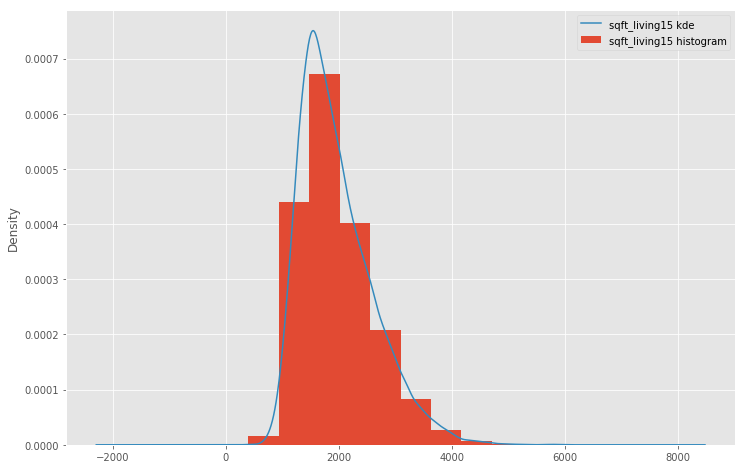

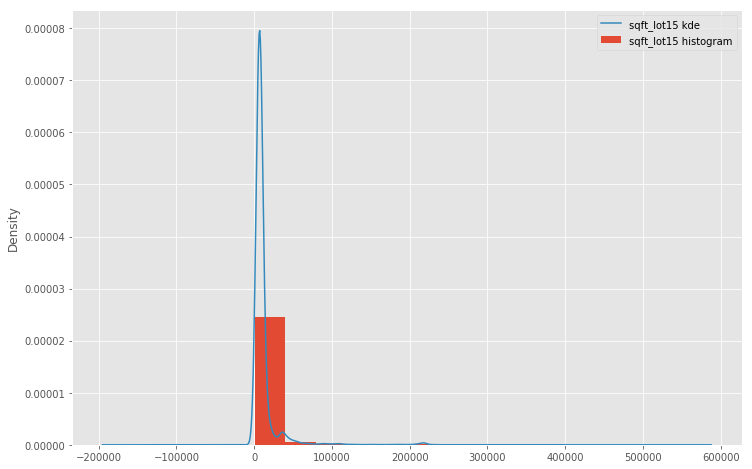

In [60]:
for x in df.iloc[:,0:16]:
    df[x].hist(density=True, label = f'{x} histogram', figsize = (12,8))
    df[x].plot.kde(label = f'{x} kde')
    plt.legend()
    plt.show()

# We see lot of skewness in most variables e.g. sqft_basement-living
# Some variables have outliers at extreme tails
# The target variable looks good with some outliers in the right tail 

# Sqft_living seems to be a good feature due to a good linear relationship with sales
# Sqft_above, bathroom and basement show a linear pattern as well but there is a higher level of variance in there than sqft_living
# The others are worse, there is too much variance along y-axis and theres no clear linear relationship with price.

Based on this, we preselected some features which appear to be more 'normal' than others:

-bathrooms

-sqft_above

-sqft_living

-sqft_lot

-sqft_basement

-bedrooms

-yr_built

-price

# Let's do Regression

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). I'll do this in a loop and in every iteration, picking one of the independent variables. 
We perform the following steps:

- Run a simple OLS regression between independent and dependent variables
- Plot a regression line on the scatter plots
- Plot the residuals using sm.graphics.plot_regress_exog()
- Plot a Q-Q plot for regression residuals normality test

In [61]:
# build the formula 
f = 'price~sqft_living'
# create a fitted model in one line
model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                 1.639e+04
Date:                Thu, 04 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:03:19   Log-Likelihood:            -2.8936e+05
No. Observations:               21171   AIC:                         5.787e+05
Df Residuals:                   21169   BIC:                         5.787e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.577e+04   3852.944     14.475      0.000    4.82e+04    6.33e+04
sqft_living   225.6375      1.763    128.019      0.000     222.183     229.092
==============================================================================
Omnibus:                     5337.011   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17526.160
Skew:                           1.272   Prob(JB):                         0.00
Kurtosis:                       6.660   Cond. No.                     5.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# R-Squared(Coefficient of Determination) is used as  "goodness of fit"-measure of the fitted line. It can take value between 0 and 1 where values closer to 0 represent a poor fit and values closer to 1 represent an (almost) perfect fit

# The p-value indicates that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response like in this case.

# Observations on "Goodness of fit" 

# R-squared value is 0.44 i.e. 44% of variance in the target variable can be explained using the variable sqft_living. 

# If we increase sq_ft living by 1 unit we expect the price of the house increasing  by 225.


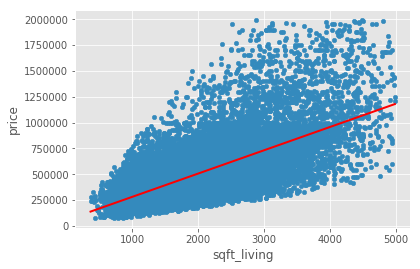

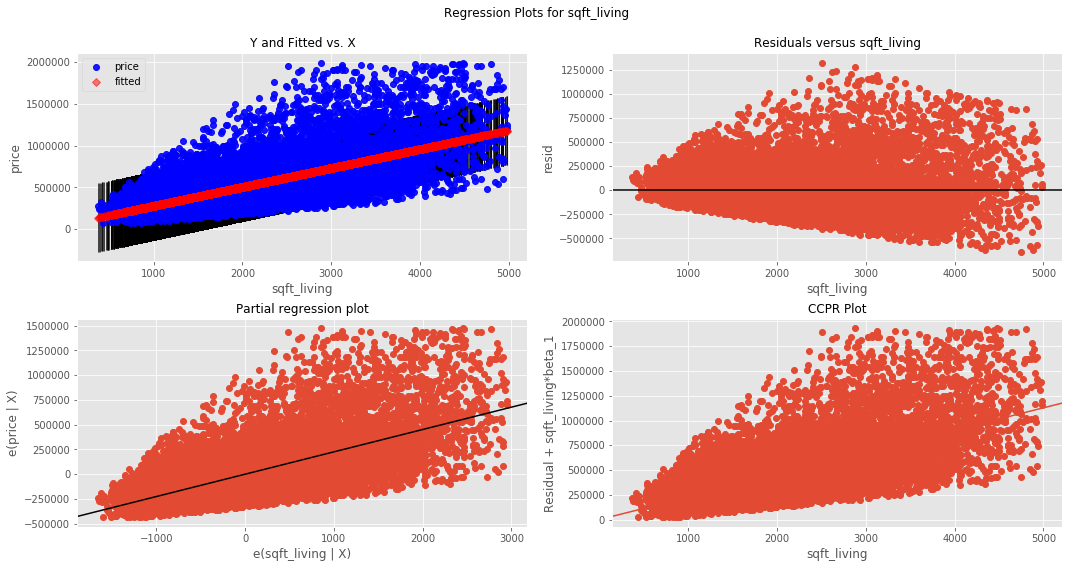

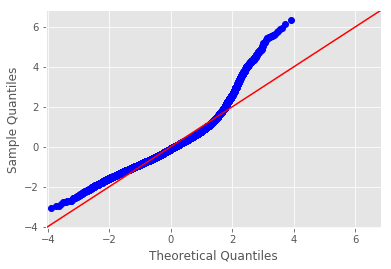

In [62]:
X_new = pd.DataFrame({'sqft_living': [df.sqft_living.min(), df.sqft_living.max()]})
preds = model.predict(X_new)
df.plot(kind='scatter', x='sqft_living', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
plt.show()

Below whe check the distribution of the residuals that in tis case seems quite good.

C:\Users\Asus\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


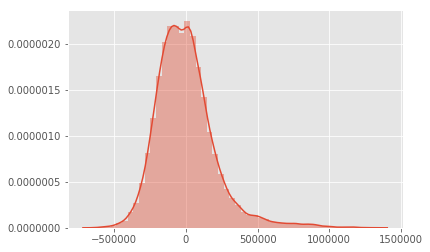

In [63]:
sns.distplot(model.resid)

# We can reject normality assumption checking the Q-Q plot.
# Presence of Heteroscedasticity in the residual plot.

In [64]:
# build the formula 
f = 'price~sqft_lot'
# create a fitted model in one line
model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     134.1
Date:                Thu, 04 Jul 2019   Prob (F-statistic):           6.31e-31
Time:                        15:03:23   Log-Likelihood:            -2.9536e+05
No. Observations:               21171   AIC:                         5.907e+05
Df Residuals:                   21169   BIC:                         5.907e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.036e+05   2088.312    241.171      0.000       5e+05    5.08e+05
sqft_lot       0.7129      0.062     11.582      0.000       0.592       0.834
==============================================================================
Omnibus:                     7312.013   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26403.664
Skew:                           1.733   Prob(JB):                         0.00
Kurtosis:                       7.233   Cond. No.                     3.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Observations on "Goodness of fit" 

# R-squared value is 0.06 i.e. 6% of variance in the target variable can be explained using the variable sqft_lot. 

# If we increase sqft_ lot by 1 unit we expect the price of the house increasing  by 0.71.

# The Q-Q plots shows

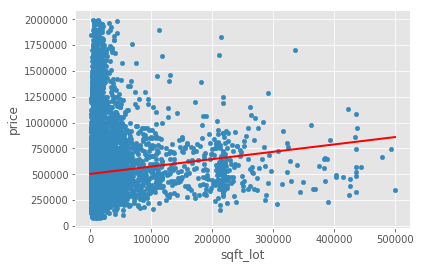

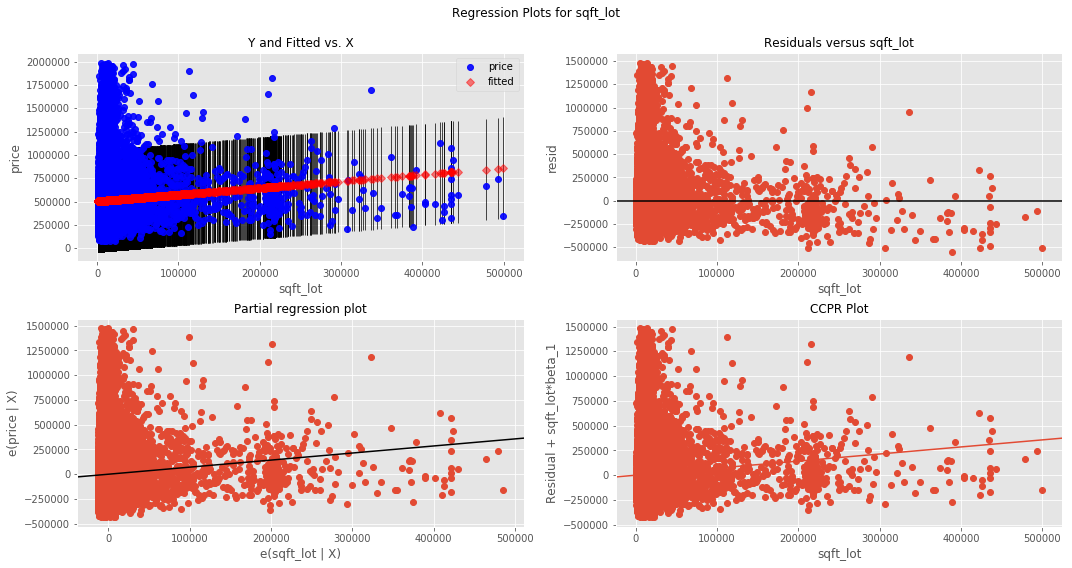

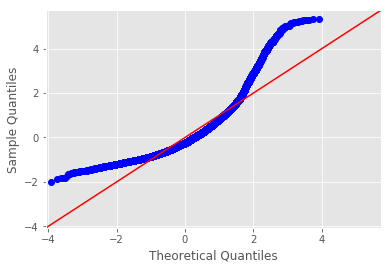

In [65]:
X_new = pd.DataFrame({'sqft_lot': [df.sqft_lot.min(), df.sqft_lot.max()]})
preds = model.predict(X_new)
df.plot(kind='scatter', x='sqft_lot', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_lot', fig=fig)
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
plt.show()

C:\Users\Asus\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


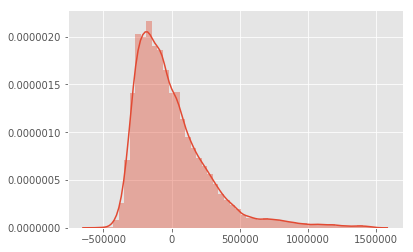

In [66]:
sns.distplot(model.resid)

# We can reject normality assumption checking the Q-Q plot.
# Presence of Heteroscedasticity in the residual plot.

In [67]:
# build the formula 
f = 'price~sqft_above'
# create a fitted model in one line
model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     9661.
Date:                Thu, 04 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:03:27   Log-Likelihood:            -2.9145e+05
No. Observations:               21171   AIC:                         5.829e+05
Df Residuals:                   21169   BIC:                         5.829e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.542e+05   3983.892     38.714      0.000    1.46e+05    1.62e+05
sqft_above   205.4152      2.090     98.290      0.000     201.319     209.511
==============================================================================
Omnibus:                     6293.600   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21766.774
Skew:                           1.488   Prob(JB):                         0.00
Kurtosis:                       6.977   Cond. No.                     4.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Observations on "Goodness of fit" 

# R-squared value is 0.313 i.e. 31% of variance in the target variable can be explained using the variable sqft_above. 

# If we increase sqft_above by 1 unit we expect the price of the house increasing  by 205.

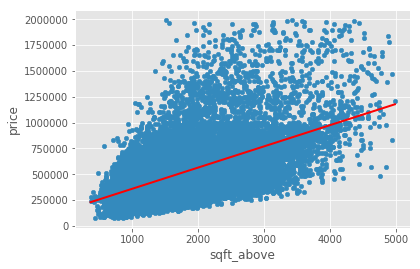

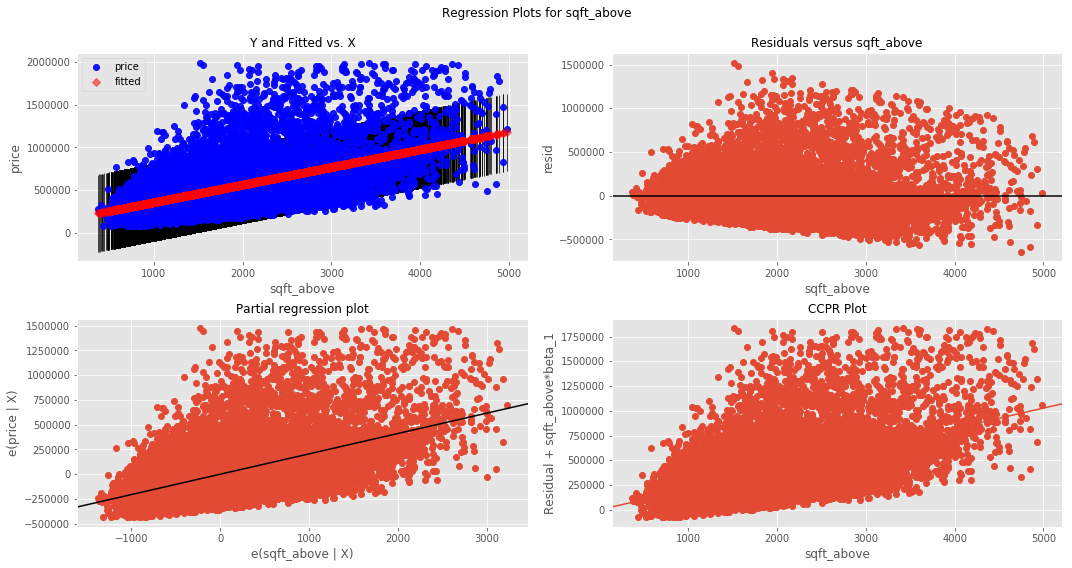

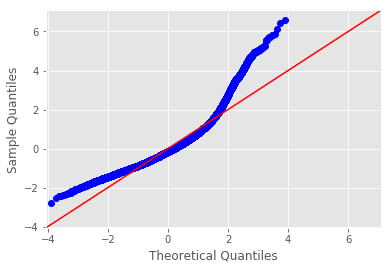

In [68]:
X_new = pd.DataFrame({'sqft_above': [df.sqft_above.min(), df.sqft_above.max()]})
preds = model.predict(X_new)
df.plot(kind='scatter', x='sqft_above', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_above', fig=fig)
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
plt.show()

C:\Users\Asus\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


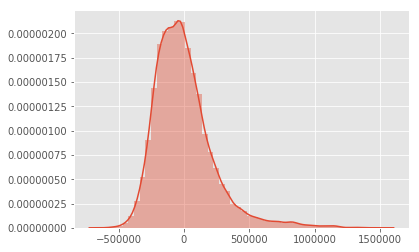

In [69]:
sns.distplot(model.resid)

# We can reject normality assumption checking the Q-Q plot.
# Presence of Heteroscedasticity in the residual plot.

In [70]:
# build the formula 
f = 'price~sqft_basement'
# create a fitted model in one line
model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1659.
Date:                Thu, 04 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:03:30   Log-Likelihood:            -2.9463e+05
No. Observations:               21171   AIC:                         5.893e+05
Df Residuals:                   21169   BIC:                         5.893e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.638e+05   2208.755    209.982      0.000    4.59e+05    4.68e+05
sqft_basement   177.9348      4.369     40.729      0.000     169.372     186.498
==============================================================================
Omnibus:                     7127.529   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25555.475
Skew:                           1.687   Prob(JB):                         0.00
Kurtosis:                       7.193   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observations on "Goodness of fit" 

# R-squared value is 0.07 i.e. 7% of variance in the target variable can be explained using the variable sqft_basement. 


# If we increase sqft_basement by 1 unit we expect the price of the house increasing  by 177.

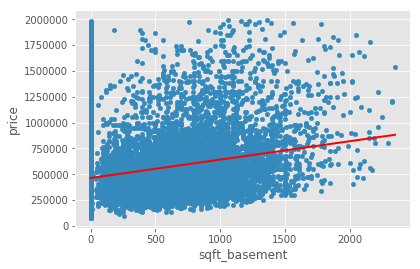

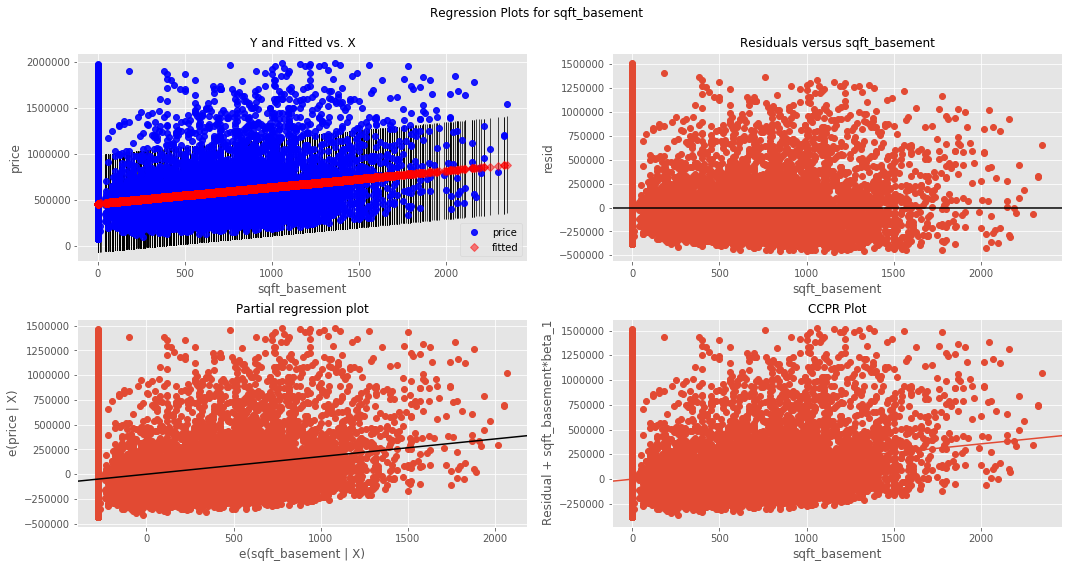

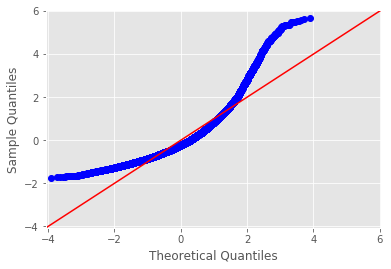

In [71]:
X_new = pd.DataFrame({'sqft_basement': [df.sqft_basement.min(), df.sqft_basement.max()]})
preds = model.predict(X_new)
df.plot(kind='scatter', x='sqft_basement', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_basement', fig=fig)
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
plt.show()

C:\Users\Asus\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


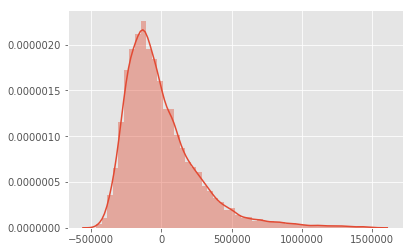

In [72]:
sns.distplot(model.resid)

# We can reject normality assumption checking the Q-Q plot.
# Presence of Heteroscedasticity in the residual plot.

In [73]:
# build the formula 
f = 'price~dt_1+dt_2+dt_3+dt_4+dt_5+dt_6+dt_7+dt_8+dt_9+dt_10+dt_11+dt_12'
# create a fitted model in one line
model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.629
Date:                Thu, 04 Jul 2019   Prob (F-statistic):           1.48e-07
Time:                        15:03:34   Log-Likelihood:            -2.9540e+05
No. Observations:               21171   AIC:                         5.908e+05
Df Residuals:                   21158   BIC:                         5.909e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.638e+16   7.97e+16     -0.833      0.405   -2.23e+17    8.98e+16
dt_1        6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_2        6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_3        6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_4        6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_5        6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_6        6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_7        6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_8        6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_9        6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_10       6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_11       6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_12       6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
==============================================================================
Omnibus:                     7276.796   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26104.747
Skew:                           1.727   Prob(JB):                         0.00
Kurtosis:                       7.203   Cond. No.                     1.57e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.34e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
# build the formula 
f = 'price~yr_built'
# create a fitted model in one line
model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     52.56
Date:                Thu, 04 Jul 2019   Prob (F-statistic):           4.31e-13
Time:                        15:03:34   Log-Likelihood:            -2.9540e+05
No. Observations:               21171   AIC:                         5.908e+05
Df Residuals:                   21169   BIC:                         5.908e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.167e+05   1.28e+05     -3.247      0.001   -6.68e+05   -1.65e+05
yr_built     472.0148     65.105      7.250      0.000     344.405     599.625
==============================================================================
Omnibus:                     7299.868   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26156.267
Skew:                           1.733   Prob(JB):                         0.00
Kurtosis:                       7.199   Cond. No.                     1.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Observations on "Goodness of fit" 

# R-squared value is 0.002 i.e. 0,2% of variance in the target variable can be explained using the variable yr_built. 


# If we increase yr_built by 1 unit we expect the price of the house increasing  by 472.

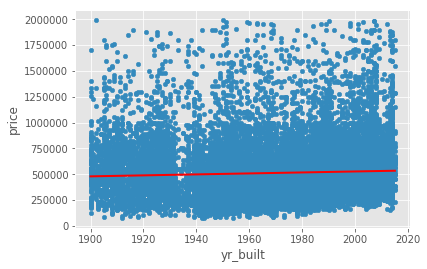

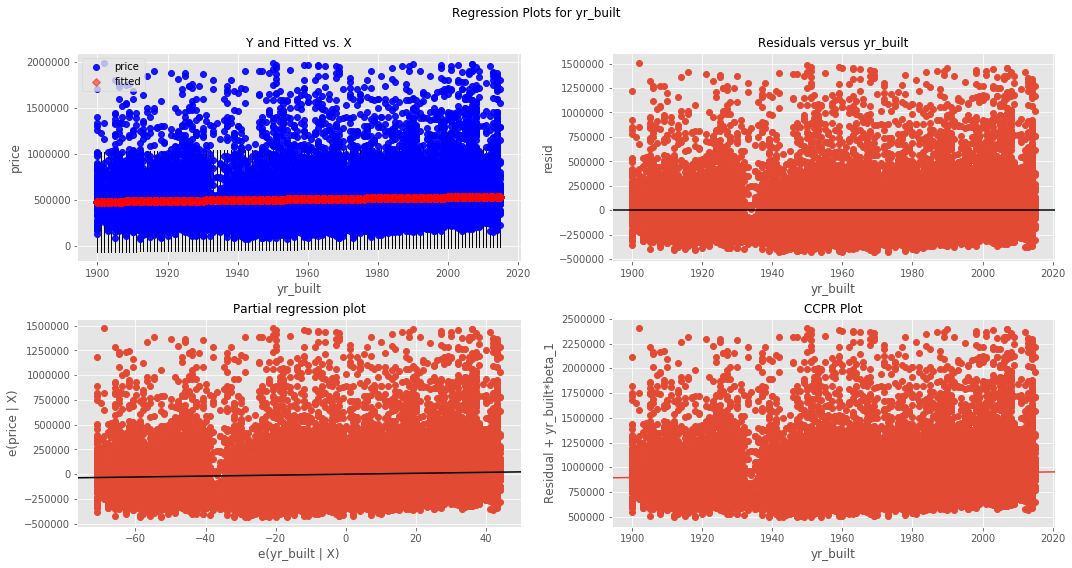

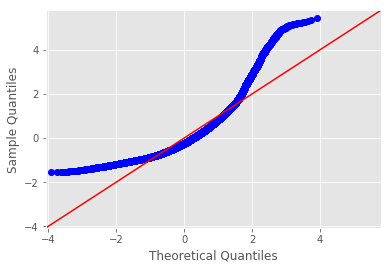

In [75]:
X_new = pd.DataFrame({'yr_built': [df.yr_built.min(), df.yr_built.max()]})
preds = model.predict(X_new)
df.plot(kind='scatter', x='yr_built', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'yr_built', fig=fig)
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
plt.show()

C:\Users\Asus\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


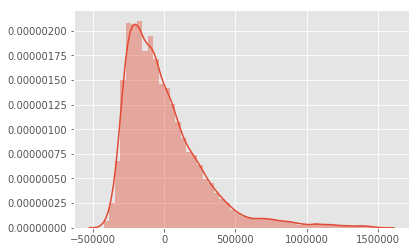

In [76]:
sns.distplot(model.resid)

# At this point I'm going to check for multicollinearity.

Moving towards regression models with multiple predictors,the idea behind it is that you can change one variable and keep the others constant, correlation is a problem, because it indicates that changes in one predictor are associated with changes in another one as well. Because of this, the estimates of the coefficients can have big fluctuations as a result of small changes in the model. As a result, you may not be able to trust the p-values associated with correlated predictors.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21171 entries, 0 to 21596
Columns: 103 entries, price to zc_98199
dtypes: float64(7), int64(9), uint8(87)
memory usage: 4.5 MB


I slice through the DataFrame getting just the feauters I need.

In [78]:
king_cont = df.iloc[:,0:16]
king_cont.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,47.6168,-122.045,1800,7503


With a Matrix plot I have a better idea of the correlation between my predictors.

The function below is calculating the correlation between avery single variable.

In [79]:
king_cont.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.313005,0.487866,0.660579,0.079352,0.271105,0.142648,0.044470,0.666569,0.559789,0.269572,0.049769,0.373822,0.026935,0.585807,0.065160
bedrooms,0.313005,1.000000,0.514549,0.601203,0.034319,0.171610,-0.024784,0.024678,0.344993,0.482835,0.293257,0.160161,-0.018040,0.136006,0.388469,0.025777
bathrooms,0.487866,0.514549,1.000000,0.732552,0.072269,0.505906,0.015234,-0.130232,0.635817,0.654355,0.238549,0.524240,0.014897,0.228623,0.542023,0.063137
sqft_living,0.660579,0.601203,0.732552,1.000000,0.175865,0.353249,0.030831,-0.062011,0.737894,0.858725,0.387754,0.337191,0.043109,0.256914,0.750037,0.165071
sqft_lot,0.079352,0.034319,0.072269,0.175865,1.000000,-0.022754,0.018492,-0.008152,0.109262,0.185985,0.005297,0.058074,-0.097191,0.258256,0.172024,0.782610
floors,0.271105,0.171610,0.505906,0.353249,-0.022754,1.000000,0.005475,-0.267715,0.457066,0.534424,-0.278690,0.494164,0.045586,0.125182,0.270567,-0.027054
waterfront,0.142648,-0.024784,0.015234,0.030831,0.018492,0.005475,1.000000,0.015862,0.027824,0.014034,0.034334,-0.037598,-0.024807,-0.048237,0.041661,0.033334
condition,0.044470,0.024678,-0.130232,-0.062011,-0.008152,-0.267715,0.015862,1.000000,-0.152972,-0.168541,0.183339,-0.358364,-0.015876,-0.102436,-0.097194,0.001252
grade,0.666569,0.344993,0.635817,0.737894,0.109262,0.457066,0.027824,-0.152972,1.000000,0.731983,0.109237,0.461049,0.109662,0.204447,0.694206,0.099681
sqft_above,0.559789,0.482835,0.654355,0.858725,0.185985,0.534424,0.014034,-0.168541,0.731983,1.000000,-0.139372,0.445401,-0.014676,0.364027,0.721213,0.177491


Because I'm looking for variables highly correlated I use a condition that is filtering just the ones highly correlated giving True when the condition is satisfied.

In [80]:
abs(king_cont.corr())> .75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False


An easy way to check the variables with high correlation is heatmap, that graphically shows the variables I'm interested in.

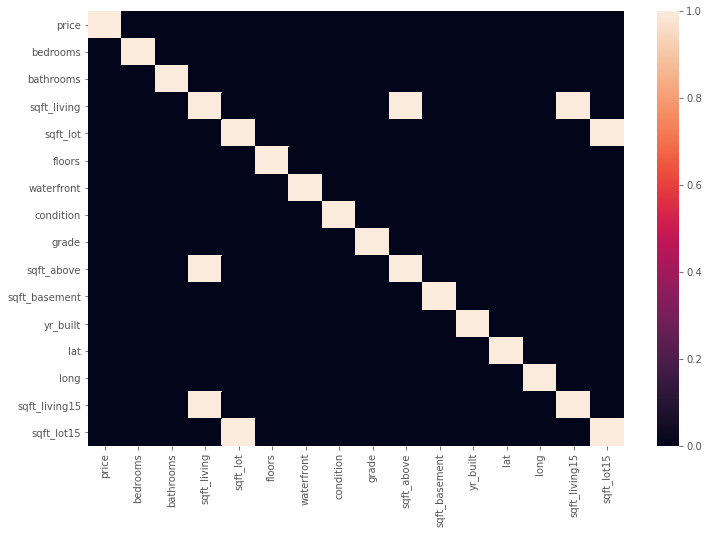

In [81]:
plt.figure(figsize = (12,8))
sns.heatmap(abs(king_cont.corr())> .75)

As we can notice the feature with higher correlation and so more problematic for us are sqft_living, sqft_living15 sqft_lot15 so in the next step we gonna take them off.

In [82]:
df = df.drop("sqft_living",axis=1)

In [83]:
df = df.drop("sqft_living15",axis=1)

In [84]:
df = df.drop("sqft_lot15",axis=1)

In [85]:
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,...,zc_98146,zc_98148,zc_98155,zc_98166,zc_98168,zc_98177,zc_98178,zc_98188,zc_98198,zc_98199
0,221900.0,3,1.00,5650,1.0,0.0,3,7,1180,0.0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,7242,2.0,0.0,3,7,2170,400.0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,10000,1.0,0.0,3,6,770,0.0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,5000,1.0,0.0,5,7,1050,910.0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,8080,1.0,0.0,3,8,1680,0.0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
X = df.drop("price", axis = 1)
y = pd.DataFrame(df, columns= ["price"])

# Stepwise selection with p-values
In stepwise selection, we start with an empty model (which only includes the intercept), and each time, the variable that has an associated parameter estimate with the lowest p-value is added to the model (forward step). After adding each new variable in the model, the algorithm will look at the p-values of all the other parameter estimates which were added to the model previously, and remove them if the p-value exceeds a certain value (backward step). The algorithm stops when no variables can be added or removed given the threshold values.

In [87]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [88]:
result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  lat                            with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  vw_0.0                         with p-value 0.0
Add  grade                          with p-value 0.0
Add  zc_98004                       with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  zc_98040                       with p-value 1.32422e-216
Add  zc_98112                       with p-value 1.07398e-188
Add  zc_98039                       with p-value 2.26826e-154
Add  waterfront                     with p-value 1.04551e-157
Add  zc_98155                       with p-value 1.78901e-98
Add  zc_98133                       with p-value 9.70697e-94
Add  zc_98028                       with p-value 2.64461e-92
Add  zc_98105                       with p-value 7.54292e-71
Add  zc_98033                       with p-value 3.46557e-66
Add  zc_98006                       with p-value 1.61951e-64
Add  zc_98199  

C:\Users\Asus\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  zc_98031                       with p-value 0.000219727
Drop zc_98125                       with p-value 0.0885019
Add  zc_98198                       with p-value 0.000253356
Add  zc_98023                       with p-value 0.000118231
Drop zc_98034                       with p-value 0.0524639
Add  zc_98092                       with p-value 9.03572e-05
Add  zc_98042                       with p-value 4.16718e-05
Add  zc_98030                       with p-value 2.89181e-05
Add  zc_98188                       with p-value 4.61197e-05
Add  zc_98168                       with p-value 4.30129e-05
Add  zc_98032                       with p-value 0.000102114
Add  zc_98003                       with p-value 0.000116735
Drop zc_98022                       with p-value 0.0987705
Add  zc_98001                       with p-value 0.000480433
Add  dt_2                           with p-value 0.000579879
Add  dt_9                           with p-value 0.00272378
resulting features:
['lat', 'sq

As we can see from te stepwise selection the features the most important features are grade, bathrooms, yr_built, lat, sqft_above, sqft_basement and waterfront.

# Final Model
For our final Model we 'played' with the best features found after the stepwise selection to find a combination with a good R-squared, trying to keep as much interpretability as possible.

In [89]:
import statsmodels.api as sm
X_fin = X[['grade', 'bathrooms', 'waterfront', 'yr_built', 'bedrooms', 'sqft_basement', 'condition']]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     4232.
Date:                Thu, 04 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:09:33   Log-Likelihood:            -2.8616e+05
No. Observations:               21171   AIC:                         5.723e+05
Df Residuals:                   21163   BIC:                         5.724e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.585e+06   1.09e+05     51.103      0.000    5.37e+06     5.8e+06
grade          1.706e+05   1473.177    115.828      0.000    1.68e+05    1.74e+05
bathrooms      8.618e+04   2655.196     32.457      0.000     8.1e+04    9.14e+04
waterfront     4.244e+05   1.82e+04     23.262      0.000    3.89e+05     4.6e+05
yr_built      -3356.0561     55.888    -60.049      0.000   -3465.602   -3246.510
bedrooms       -972.9940   1658.687     -0.587      0.557   -4224.147    2278.159
sqft_basement    52.2879      3.265     16.015      0.000      45.889      58.687
condition      1.504e+04   2056.231      7.315      0.000     1.1e+04    1.91e+04
==============================================================================
Omnibus:                     5428.139   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22621.556
Skew:                           1.211   Prob(JB):                         0.00
Kurtosis:                       7.447   Cond. No.                     1.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Here it is our Final Model!
# R-squared adj. is 0.58 meausuring a decent 'goodness of fit' of our fitted line.
# P-values are all <0.05 so statistically significant.

# An increase of 1 unit in grade would increase house prices of $154600.

# An additional bathrooms would increase house prices of $89830.

# The presence of a waterfront would increase house prices of $476800

Let's check which are the features of our model that are more important.
To do so we need to scale our predictors.

# Scaling
Often, our dataset will contain features that largely vary in magnitudes. If we leave these magnitudes unchanged, coefficient sizes will largely fluctuate in magnitude as well. This can give the false impression that some variables are less important than others.

MinMax scaling brings values between 0 and 1

In [90]:
scaler = MinMaxScaler()
scaler.fit(X)
scaled_data= scaler.transform(X)
new_df = pd.DataFrame(scaled_data)

In [91]:
new_df.columns= X.columns

In [92]:
new_df.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,...,zc_98146,zc_98148,zc_98155,zc_98166,zc_98168,zc_98177,zc_98178,zc_98188,zc_98198,zc_98199
0,0.2,0.071429,0.010280,0.0,0.0,0.5,0.4,0.175705,0.000000,0.478261,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.2,0.250000,0.013470,0.4,0.0,0.5,0.4,0.390456,0.170213,0.443478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.1,0.071429,0.018996,0.0,0.0,0.5,0.3,0.086768,0.000000,0.286957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.3,0.357143,0.008977,0.0,0.0,1.0,0.4,0.147505,0.387234,0.565217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.214286,0.015149,0.0,0.0,0.5,0.5,0.284165,0.000000,0.756522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
y.reset_index(inplace = True, drop = True)
new_df.reset_index(inplace = True, drop = True)

# Model scaled with all the predictors

In [94]:
X_fin = new_df
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1112.
Date:                Thu, 04 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:09:34   Log-Likelihood:            -2.7635e+05
No. Observations:               21171   AIC:                         5.529e+05
Df Residuals:                   21074   BIC:                         5.537e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.553e+04   1.71e+04      3.240      0.001    2.19e+04    8.91e+04
bedrooms      -1.264e+05   1.16e+04    -10.871      0.000   -1.49e+05   -1.04e+05
bathrooms      1.412e+05   1.32e+04     10.664      0.000    1.15e+05    1.67e+05
sqft_lot       1.523e+05   1.41e+04     10.784      0.000    1.25e+05     1.8e+05
floors        -6.401e+04   5674.224    -11.281      0.000   -7.51e+04   -5.29e+04
waterfront     3.029e+05   1.38e+04     21.951      0.000    2.76e+05     3.3e+05
condition      9.436e+04   5402.221     17.466      0.000    8.38e+04    1.05e+05
grade          6.046e+05   1.28e+04     47.377      0.000     5.8e+05     6.3e+05
sqft_above     7.203e+05      1e+04     71.872      0.000    7.01e+05     7.4e+05
sqft_basement  2.178e+05   6177.751     35.249      0.000    2.06e+05     2.3e+05
yr_built      -8.389e+04   5064.363    -16.565      0.000   -9.38e+04    -7.4e+04
lat            9.503e+04   2.81e+04      3.385      0.001       4e+04     1.5e+05
long          -9.767e+04   3.92e+04     -2.494      0.013   -1.74e+05   -2.09e+04
vw_0.0        -1.049e+05   4171.380    -25.136      0.000   -1.13e+05   -9.67e+04
vw_1.0         -2.61e+04   6595.328     -3.957      0.000    -3.9e+04   -1.32e+04
vw_2.0        -2.917e+04   5066.334     -5.758      0.000   -3.91e+04   -1.92e+04
vw_3.0         4.825e+04   5895.132      8.185      0.000    3.67e+04    5.98e+04
vw_4.0         1.674e+05   8166.942     20.497      0.000    1.51e+05    1.83e+05
dt_1           2566.1362   3749.951      0.684      0.494   -4784.054    9916.327
dt_2           1.006e+04   3379.596      2.975      0.003    3431.054    1.67e+04
dt_3           2.799e+04   2913.406      9.607      0.000    2.23e+04    3.37e+04
dt_4           3.368e+04   2767.513     12.171      0.000    2.83e+04    3.91e+04
dt_5           4474.8733   2682.565      1.668      0.095    -783.159    9732.906
dt_6           1281.1702   2780.505      0.461      0.645   -4168.832    6731.172
dt_7            -40.2461   2760.700     -0.015      0.988   -5451.430    5370.938
dt_8          -3795.0957   2880.398     -1.318      0.188   -9440.897    1850.705
dt_9          -9095.0565   2981.281     -3.051      0.002   -1.49e+04   -3251.518
dt_10         -3263.0234   2909.162     -1.122      0.262   -8965.203    2439.156
dt_11         -5704.5723   3236.441     -1.763      0.078    -1.2e+04     639.100
dt_12         -2620.1396   3176.481     -0.825      0.409   -8846.286    3606.006
zc_98001      -1.603e+05   1.27e+04    -12.670      0.000   -1.85e+05   -1.35e+05
zc_98002      -1.409e+05   1.35e+04    -10.452      0.000   -1.67e+05   -1.14e+05
zc_98003      -1.734e+05   1.31e+04    -13.221      0.000   -1.99e+05   -1.48e+05
zc_98004       4.952e+05   7456.949     66.404      0.000    4.81e+05     5.1e+05
zc_98005        1.37e+05   9394.428     14.587   

# The model has a R-squared adj. of 0.834 that defines a pretty high goodness of fit of the fitted line.
## We can see from the coefficients that the ones having a higher impact on the dependant variable price are grade, bathrooms, waterfront and bedrooms.

# Final Model Scaled

In [95]:
X_fin = new_df[['grade', 'bathrooms', 'waterfront', 'yr_built', 'bedrooms', 'sqft_basement', 'condition']]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     4232.
Date:                Thu, 04 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:09:35   Log-Likelihood:            -2.8616e+05
No. Observations:               21171   AIC:                         5.723e+05
Df Residuals:                   21163   BIC:                         5.724e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.225e+05   8360.568    -26.608      0.000   -2.39e+05   -2.06e+05
grade          1.706e+06   1.47e+04    115.828      0.000    1.68e+06    1.74e+06
bathrooms      6.033e+05   1.86e+04     32.457      0.000    5.67e+05     6.4e+05
waterfront     4.244e+05   1.82e+04     23.262      0.000    3.89e+05     4.6e+05
yr_built      -3.859e+05   6427.171    -60.049      0.000   -3.99e+05   -3.73e+05
bedrooms      -9729.9404   1.66e+04     -0.587      0.557   -4.22e+04    2.28e+04
sqft_basement  1.229e+05   7672.444     16.015      0.000    1.08e+05    1.38e+05
condition      6.017e+04   8224.923      7.315      0.000     4.4e+04    7.63e+04
==============================================================================
Omnibus:                     5428.139   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22621.556
Skew:                           1.211   Prob(JB):                         0.00
Kurtosis:                       7.447   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Comments on the final model scaled

## The final model obtained present the same Adj. R-squared of the non-scaled model.
## The variables with an higher impact are grade, bathrooms and the presence of a waterfall.
## So in terms of house prices, when possible, are definitely these the variables to maximise.
## P-valus for these predictors are all statistically significant

# Now I'm gonna formulate 3 questions for the assignment:

- Which one is the variable that has a bigger impact on house pricing?


The variable with a bigger impact is the presence of a waterfall grade, that by itself explained an increase of $154600.


- How positive is the presence of an additional bathroom instead of a bedroom in terms of potential overall price?


Really positive as we can see from the stepwise selection is the second most important feature.


- Is it the month a variable to take in consideration when selling a house?


Let's recall below the model to check the coefficients related for the single months.

In [96]:
# build the formula 
f = 'price~dt_1+dt_2+dt_3+dt_4+dt_5+dt_6+dt_7+dt_8+dt_9+dt_10+dt_11+dt_12'
# create a fitted model in one line
model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.629
Date:                Thu, 04 Jul 2019   Prob (F-statistic):           1.48e-07
Time:                        15:09:35   Log-Likelihood:            -2.9540e+05
No. Observations:               21171   AIC:                         5.908e+05
Df Residuals:                   21158   BIC:                         5.909e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.638e+16   7.97e+16     -0.833      0.405   -2.23e+17    8.98e+16
dt_1        6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_2        6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_3        6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_4        6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_5        6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_6        6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_7        6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_8        6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_9        6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_10       6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_11       6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
dt_12       6.638e+16   7.97e+16      0.833      0.405   -8.98e+16    2.23e+17
==============================================================================
Omnibus:                     7276.796   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26104.747
Skew:                           1.727   Prob(JB):                         0.00
Kurtosis:                       7.203   Cond. No.                     1.57e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.34e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

As we can see from the model above the month has an high influence on price depending on the month.
March, April, May and  July present coefficients twice bigger than February(the lowest one).
April's results being the best month, his coefficient results 3 times bigger than February.

So the answer at the 3rd question is definitely yes.

# Use Feature ranking with recursive feature elimination

In [97]:
X = X_fin

Below we initialize the model class

In [98]:
linreg = LinearRegression()

Then we select the number of features more important that we want to know.

In [99]:
selector = RFE(linreg, n_features_to_select=1)

In [100]:
selector = selector.fit(X, df['price'])

In [101]:
selector.support_

array([ True, False, False, False, False, False, False])

In [102]:
selected_columns = X.columns[selector.support_]
selected_columns

Index(['grade'], dtype='object')

We fit our features to check and the target variable.

In [103]:
linreg.fit(X[selected_columns],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
selector.ranking_

array([1, 2, 4, 3, 7, 5, 6])

Below we plot our features in a bar chat to compare the more important(lower score) and less importants.

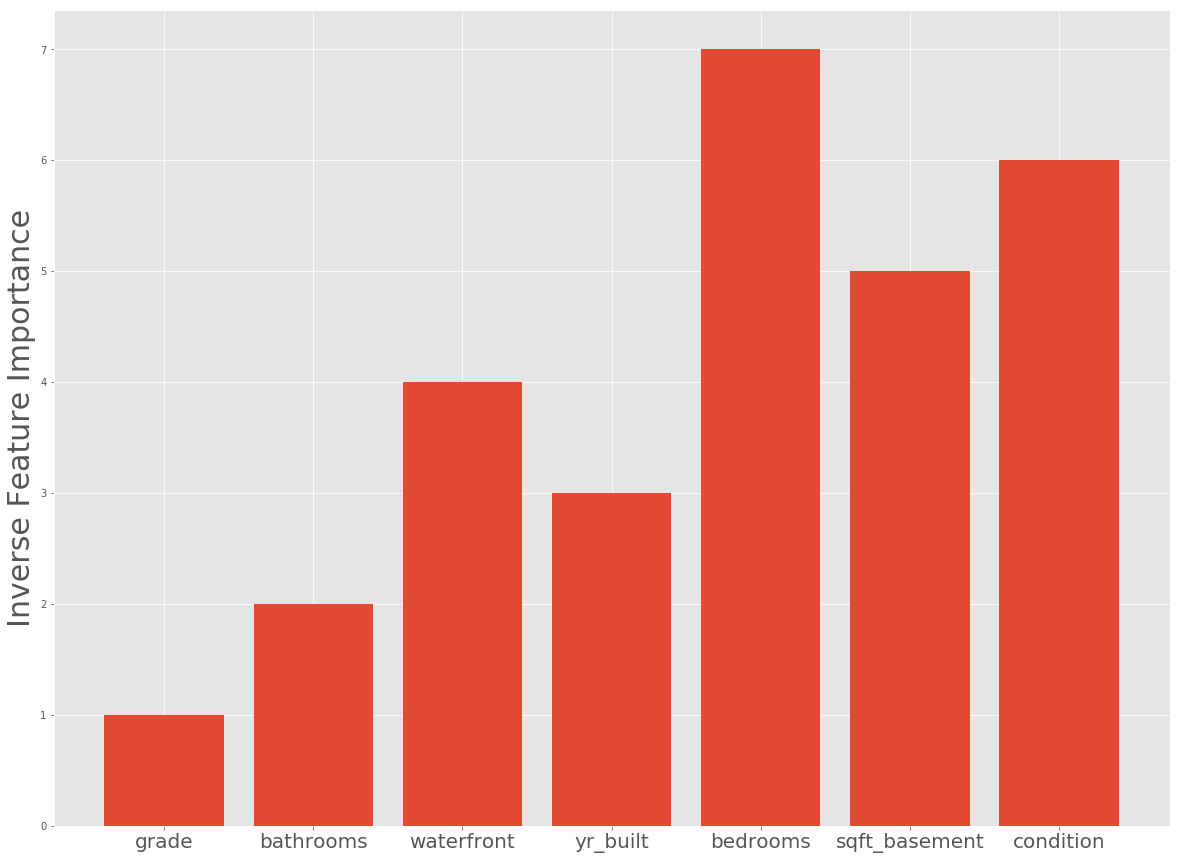

In [105]:
plt.figure(figsize = (20,15))
plt.rc('xtick',labelsize=20)
plt.ylabel('Inverse Feature Importance', size = 30)
plt.bar(X.columns, selector.ranking_);

Grade is the most important feature followed by batroom and so on.

# Train Test Split

Making predictions and evaluation
So far we've simply been fitting models to data, and evaluated our models calculating the errors between our  ŷ  and our actual targets y, while these targets y contributed in fitting the model.

The reason why we built the model in the first place, however, is because we want to predict the outcome for observations that are not necessarily in our data set now. 

In order to get a good sense of how well your model will be doing on new instances, we'll have to perform a so-called "train-test-split". What we'll be doing here, is take a sample of the data that serves as input to "train" our model - fit a linear regression and compute the parameter estimates for our variables, and calculate how well our predictive performance is doing comparing the actual targets y  and the fitted  ŷ obtained by our model.

We gonna split the data of our dataset in 2 parts, a trainig set corresponding at the 75% of it where we will train our data and a test set of 25% where we apply what we obtain

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [107]:
X_train.shape, X_test.shape

((15878, 7), (5293, 7))

In [108]:
15995/(15994+5332)

0.750023445559411

75% of data are the train

In [109]:
#A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

15878 5293 15878 5293


We fit the model and apply the model to the make test set predictions

In [110]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

Now we calculate the residuals, so the difference between the predicted value and the actual one

In [112]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [113]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 32097450932.873917
Test Mean Squarred Error: 32586295312.614445


# Evaluating the effect of train-test split size

We iterate over a range of train-test split sizes from .5 to .95. For each of these, we generate a new train/test split sample. We then fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. We finally plot these two curves (train error vs. training size and test error vs. training size) on a graph.

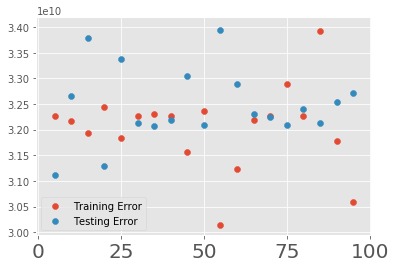

In [114]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

Train MSE and Test MSE are almost equal, that's usually a good sign meaning that, if the model is overfitted I would expect the MSE on the Train set be really small and really high on the Test set.
So in this scenario we could be dealing with a good fit model or underfitted

The downside of the train test split is that every time we do a split we obtain a slighlty different result.

That's where doing Cross-Validation has a big advantage because with it we're doing a multiple split test and getting the average value from it

# Cross Validation

We're splitting our data into even chunks

In [125]:
np.array_split(X, 5)

[      grade  bathrooms  waterfront  yr_built  bedrooms  sqft_basement  \
 0       0.4   0.071429         0.0  0.478261       0.2       0.000000   
 1       0.4   0.250000         0.0  0.443478       0.2       0.170213   
 2       0.3   0.071429         0.0  0.286957       0.1       0.000000   
 3       0.4   0.357143         0.0  0.565217       0.3       0.387234   
 4       0.5   0.214286         0.0  0.756522       0.2       0.000000   
 5       0.4   0.250000         0.0  0.826087       0.2       0.000000   
 6       0.4   0.071429         0.0  0.521739       0.2       0.310638   
 7       0.4   0.285714         0.0  0.895652       0.2       0.000000   
 8       0.5   0.285714         0.0  0.565217       0.2       0.723404   
 9       0.4   0.071429         0.0  0.365217       0.1       0.127660   
 10      0.4   0.071429         0.0  0.234783       0.2       0.000000   
 11      0.4   0.178571         0.0  0.669565       0.2       0.000000   
 12      0.4   0.214286         0.0  0

In [126]:
def kfolds(data, k):
    return np.array_split(data, k)

In [127]:
df_cross = pd.concat((X, y), axis = 1)

In [128]:
df_cross

,grade,bathrooms,waterfront,yr_built,bedrooms,sqft_basement,condition,price
0,0.4,0.071429,0.0,0.478261,0.2,0.000000,0.50,221900.0
1,0.4,0.250000,0.0,0.443478,0.2,0.170213,0.50,538000.0
2,0.3,0.071429,0.0,0.286957,0.1,0.000000,0.50,180000.0
3,0.4,0.357143,0.0,0.565217,0.3,0.387234,1.00,604000.0
4,0.5,0.214286,0.0,0.756522,0.2,0.000000,0.50,510000.0
5,0.4,0.250000,0.0,0.826087,0.2,0.000000,0.50,257500.0
6,0.4,0.071429,0.0,0.521739,0.2,0.310638,0.50,229500.0
7,0.4,0.285714,0.0,0.895652,0.2,0.000000,0.50,323000.0
8,0.5,0.285714,0.0,0.565217,0.2,0.723404,0.50,662500.0
9,0.4,0.071429,0.0,0.365217,0.1,0.127660,0.75,468000.0


In [129]:
king_folds = kfolds(df_cross, 5)

## Perform a linear regression for each fold, and calculate the training and test error

In [130]:
test_errs = []
train_errs = []
k=5

for n in range(k):
    # Split in train and test for the fold
    train = pd.concat([fold for i, fold in enumerate(king_folds) if i!=n])
    test = king_folds[n]
    # Fit a linear regression model
    linreg.fit(train[X.columns], train[y.columns])
    #Evaluate Train and Test Errors
    y_hat_train = linreg.predict(train[X.columns])
    y_hat_test = linreg.predict(test[X.columns])
    train_residuals = y_hat_train - train[y.columns]
    test_residuals = y_hat_test - test[y.columns]
    train_errs.append(np.mean(train_residuals.astype(float)**2))
    test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

[price    3.279973e+10
dtype: float64, price    3.210867e+10
dtype: float64, price    3.249173e+10
dtype: float64, price    3.196558e+10
dtype: float64, price    3.160220e+10
dtype: float64]
[price    2.991301e+10
dtype: float64, price    3.267478e+10
dtype: float64, price    3.113749e+10
dtype: float64, price    3.324834e+10
dtype: float64, price    3.515232e+10
dtype: float64]


In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")

In [132]:
cv_5_results

array([-2.99130131e+10, -3.26747756e+10, -3.11374930e+10, -3.32483440e+10,
       -3.51523233e+10])

As we can see all the coefficients are quite small compared to each other so we can confirm the result obtain with the Train, Test and Split tool above, saying that the model is not overfitted.